 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Introdução-ao-NumPy---Redução-de-eixo" data-toc-modified-id="Introdução-ao-NumPy---Redução-de-eixo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introdução ao NumPy - Redução de eixo</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Operação-combinando-todos-os-pixels" data-toc-modified-id="Operação-combinando-todos-os-pixels-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Operação combinando todos os pixels</a></span></li><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Operação-combinando-eixos-(redução-de-eixo)" data-toc-modified-id="Operação-combinando-eixos-(redução-de-eixo)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Operação combinando eixos (redução de eixo)</a></span></li><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Outros-exemplos-numéricos" data-toc-modified-id="Outros-exemplos-numéricos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outros exemplos numéricos</a></span></li><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Cumsum---Soma-acumulativa-(não-é-redução-de-eixo)" data-toc-modified-id="Cumsum---Soma-acumulativa-(não-é-redução-de-eixo)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cumsum - Soma acumulativa (não é redução de eixo)</a></span></li><li><span><a href="http://localhost:8888/notebooks/ia898/master/tutorial_numpy_1_5a.ipynb#Redução-no-eixo-com-aplicações-em-imagens" data-toc-modified-id="Redução-no-eixo-com-aplicações-em-imagens-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Redução no eixo com aplicações em imagens</a></span></li></ul></li></ul></div>

# Introdução ao NumPy - Redução de eixo

## Operação combinando todos os pixels

Existem várias funções que calculam valores estatísticos da imagem, como valor máximo, valor médio, 
soma, entre outras, que permitem sua aplicação em todos os pixels resultando num valor escalar único.

Vejam alguns exemplos de cálculo do máximo valor do array, valor médio e somatório de todos os valores:

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

a = mpimg.imread('../data/cameraman.tif')[:5*20:20,:4*20:20]
print("a = \n", a)
print('a.max()=',  a.max())
print('a.mean()=', a.mean())
print('a.sum()=',  a.sum())

a = 
 [[169 186 201 214]
 [179 200 208 225]
 [181 203 219 203]
 [188 214  14  12]
 [188  40  14  10]]
a.max()= 225
a.mean()= 153.4
a.sum()= 3068


A título de curiosidade, em processamento paralelo, fazer este tipo de operação, que acumula um 
único valor a partir dos valores de cada pixel é uma das operações mais ineficientes, pois
existe o gargalo que todos os pixels precisam ser acumulados numa única variável. Este tipo
de operação, em processamento paralelo, é denominada ``redução``, pois você reduz todos os
elementos do ``ndarray`` a um único valor.

## Operação combinando eixos (redução de eixo)
    
É possível também fazer estas operações que combinam os pixels, apenas em alguns eixos, isto é 
denominado redução de eixo. Para se conseguir isto, basta utilizar como parâmetro da função
usada para a combinação dos valores o eixo em que os valores serão calculados. Assim, se a
imagem for bidimensional, eixos 0 (linhas) e 1 (colunas), se quisermos combinar na direção
das linhas utilizamos 0 como parâmetro e se quisermos acumular na direção das colunas, utilizamos
um como parâmetro. Existem vários métodos que podem ser utilizados.
Vejamos os exemplos a seguir:
    

In [3]:
print('a =\n',a)
print('a.shape = ', a.shape)
print('a.max(axis=0) = ', a.max(0))
print('a.max(axis=0).shape = ', a.max(0).shape)
print('a.max(axis=1) = ', a.max(1))
print('a.max(axis=1).shape = ', a.max(1).shape)

a =
 [[169 186 201 214]
 [179 200 208 225]
 [181 203 219 203]
 [188 214  14  12]
 [188  40  14  10]]
a.shape =  (5, 4)
a.max(axis=0) =  [188 214 219 225]
a.max(axis=0).shape =  (4,)
a.max(axis=1) =  [214 225 219 214 188]
a.max(axis=1).shape =  (5,)


Note que ``a.max(0)`` opera no eixo das linhas, resultando o valor máximo de cada coluna. O
resultado possui 4 elementos que é o número de colunas de ``a``. Note que o shape foi reduzido de (5,4) para (4,), pois a
operação se deu na dimensão 0.

Já o ``a.max(1)`` opera na direção do eixo nas colunas, resultando o máximo em cada linha. 
O shape reduziu de (5,4) para (5,).

## Outros exemplos numéricos

A seguir outros exemplos reduzindo o eixo 0 (linhas). Em todos os exemplos a seguir, como a redução
se dá no eixo 0, o vetor resultante terá shape (4,), pois o eixo 0 do shape (5,4) de ``a``.

In [4]:
print('a =\n',a)
print('a.mean(axis=0) = ', a.mean(0))
print('a.min(axis=0) = ', a.min(0))
print('a.sum(axis=0) = ', a.sum(0))

a =
 [[169 186 201 214]
 [179 200 208 225]
 [181 203 219 203]
 [188 214  14  12]
 [188  40  14  10]]
a.mean(axis=0) =  [ 181.   168.6  131.2  132.8]
a.min(axis=0) =  [169  40  14  10]
a.sum(axis=0) =  [905 843 656 664]


## Cumsum - Soma acumulativa (não é redução de eixo)

In [4]:
import numpy as np
a = np.arange(10)
print(a)
print(np.cumsum(a))


[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]


In [5]:
a = np.arange(4*6).reshape(4,6)
print(a)
print('a.cumsum(axis=0) = \n', a.cumsum(axis=0))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
a.cumsum(axis=0) = 
 [[ 0  1  2  3  4  5]
 [ 6  8 10 12 14 16]
 [18 21 24 27 30 33]
 [36 40 44 48 52 56]]


## Redução no eixo com aplicações em imagens

No exemplo abaixo, calculamos o perfil médio das colunas numa imagem que 
representa um recorte de uma parte de uma calculadora.

O perfil médio dos pixels é calculado com a operação de ``mean(0)`` para se fazer a redução
da dimensão 0 (linhas). Veja a interpretação da curva no gráfico. As teclas são escuras, porém as
letras são bem claras dando um valor médio 
mais baixo que o fundo das teclas que possui um nível de cinza maior. Observe que ``mean(0)``
irá calcular a média de cada coluna, assim, o ``hmean[0]`` abaixo será a média de todos os pixels
da primeira coluna, o ``hmean[1]``, a média de todos os pixels da segunda coluna de ``f`` e 
assim por diante. Veja que a operação sendo na direção das linhas (eixo 0), podemos interpretar
que o resultado é uma linha horizontal média da imagem ou é uma linha onde cada elemento é a
média dos pixels de cada coluna da imagem.  

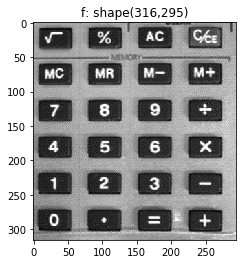

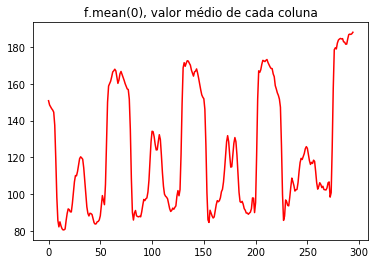

In [6]:
f = mpimg.imread('../data/keyb.tif')
plt.figure(0)
plt.imshow(f,cmap='gray'); plt.title('f: shape(%d,%d)' % (f.shape[0], f.shape[1]))
hmean = f.mean(axis=0)
plt.figure(1)
plt.plot(hmean,color='r')
plt.ylabel='intensidade'
plt.xlabel='coluna'
plt.title('f.mean(0), valor médio de cada coluna');

Veja o exemplo similar, mas agora calculando os valores mínimos de cada coluna. 

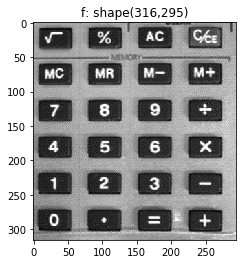

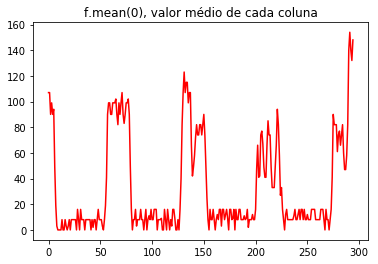

In [7]:
f = mpimg.imread('../data/keyb.tif')
plt.figure(0)
plt.imshow(f,cmap='gray'); plt.title('f: shape(%d,%d)' % (f.shape[0], f.shape[1]))
hmin = f.min(axis=0)
plt.figure(1)
plt.plot(hmin,color='r')
plt.ylabel='intensidade'
plt.xlabel='coluna'
plt.title('f.mean(0), valor médio de cada coluna');